In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [2]:
df = pd.read_csv("./data/fashion/fashion-mnist_train.csv")

In [3]:
X = df.iloc[:,1:].values.reshape(-1,28,28,1)
X = X/255.

### Create our generator network

In [4]:
latent_dim = 100
generator = Sequential([
    Dense(784, input_shape=(latent_dim,), activation='tanh'),
    Reshape((28,28,1))
])

In [5]:
noise = tf.random.normal([1,100])

In [6]:
generated_img = generator(noise)

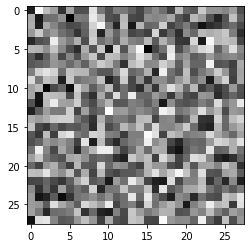

In [7]:
plt.imshow(generated_img.numpy().reshape(28,28), cmap='gray')

### Discriminator network

In [8]:
discriminator = Sequential([
    Dense(64, input_shape=(28,28,1)), # Number of neurons here is an (un)educated guess
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [9]:
discriminator(generated_img)

<tf.Tensor: id=174, shape=(1, 1), dtype=float32, numpy=array([[0.50141066]], dtype=float32)>

### Specifying the loss function for generator and discriminator

- Discriminator will learn to distinguish between the distribution that generates the real data and the fake.
- Generator will lose if the discriminator guesses that its output is fake.

In [10]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [11]:
def discriminator_loss(real, fake):
    real_loss = cross_entropy(tf.ones_like(real), real)
    fake_loss = cross_entropy(tf.zeros_like(fake), fake)
    total_loss = real_loss + fake_loss
    return total_loss

In [12]:
def generator_loss(fake):
    return cross_entropy(tf.ones_like(fake), fake)

In [13]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)  # Optimizer for weight updates on generator
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Defining the training step

We write the training step as a function, so that we can later decorate it as a `tf.function`, which will speed up the training.

In [14]:
@tf.function
def train_step(images):
    noise = tf.random.normal([256, 100]) # (batch_size, noise_dim)
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True) # Discriminator gets a batch of real images and scores them
        fake_output = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    # Store the gradients of each
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    # We pass gradients to the optimizer
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

#### Auxiliary function to generate and save images (from a noisy seed)

In [15]:
def generate_and_save_images(model, epoch, test_input):
    # For each epoch, we generate a few samples using model(test_input)  (model = generator)
    predictions = model(test_input, training=False) # Inference mode
    
    fig = plt.figure(figsize=(4,4))
    
    for i in range(predictions.shape[0]):
        plt.subplot(4,4,i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.savefig('image_at_epoch_{}.png'.format(epoch))
    plt.show()

### Main training loop

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices(X).shuffle(X.shape[0]).batch(256) # batch size of 256

In [17]:
# Seed to track progress of our training
seed = tf.random.normal([16, latent_dim]) # (num_examples, latent_dim (noise dimension))

In [18]:
tf.keras.backend.set_floatx('float64')


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch number 1 is finished. Looks like this: 



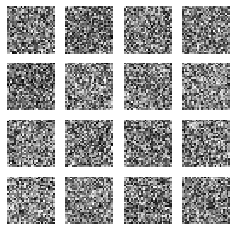

Epoch number 2 is finished. Looks like this: 



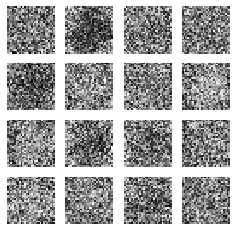

Epoch number 3 is finished. Looks like this: 



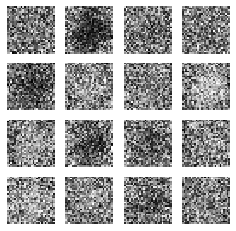

Epoch number 4 is finished. Looks like this: 



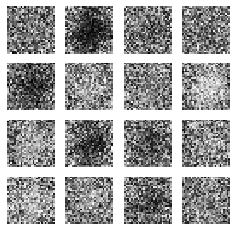

Epoch number 5 is finished. Looks like this: 



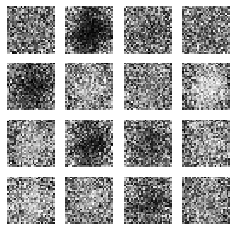

Epoch number 6 is finished. Looks like this: 



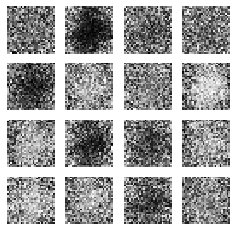

Epoch number 7 is finished. Looks like this: 



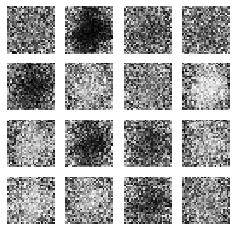

Epoch number 8 is finished. Looks like this: 



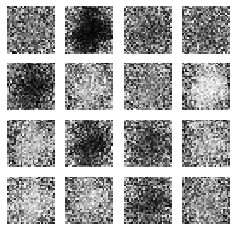

Epoch number 9 is finished. Looks like this: 



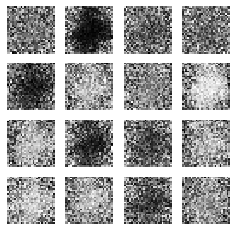

Epoch number 10 is finished. Looks like this: 



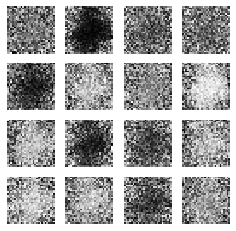

Epoch number 11 is finished. Looks like this: 



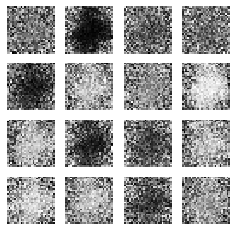

Epoch number 12 is finished. Looks like this: 



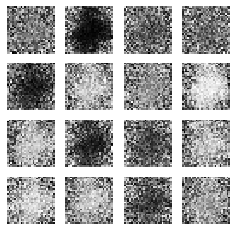

Epoch number 13 is finished. Looks like this: 



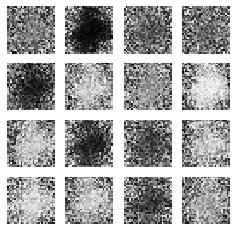

Epoch number 14 is finished. Looks like this: 



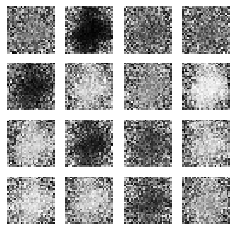

Epoch number 15 is finished. Looks like this: 



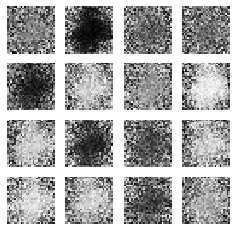

Epoch number 16 is finished. Looks like this: 



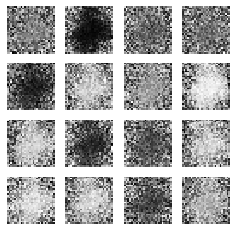

Epoch number 17 is finished. Looks like this: 



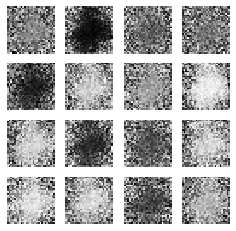

Epoch number 18 is finished. Looks like this: 



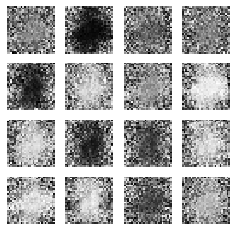

Epoch number 19 is finished. Looks like this: 



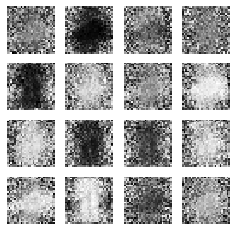

Epoch number 20 is finished. Looks like this: 



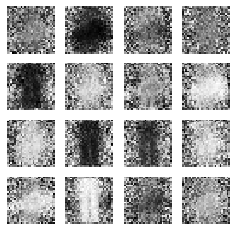

Epoch number 21 is finished. Looks like this: 



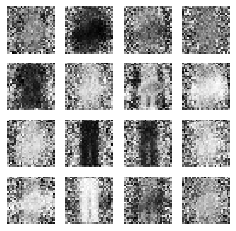

Epoch number 22 is finished. Looks like this: 



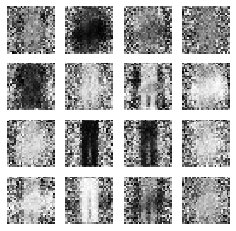

Epoch number 23 is finished. Looks like this: 



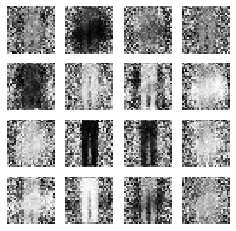

Epoch number 24 is finished. Looks like this: 



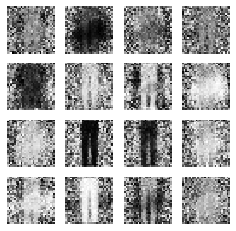

Epoch number 25 is finished. Looks like this: 



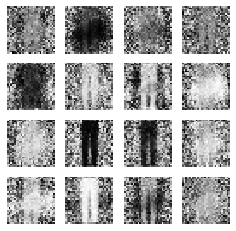

Epoch number 26 is finished. Looks like this: 



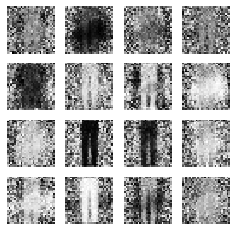

Epoch number 27 is finished. Looks like this: 



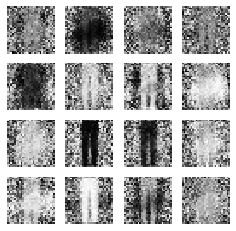

Epoch number 28 is finished. Looks like this: 



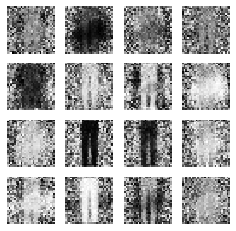

Epoch number 29 is finished. Looks like this: 



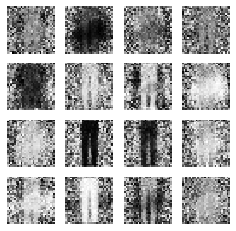

Epoch number 30 is finished. Looks like this: 



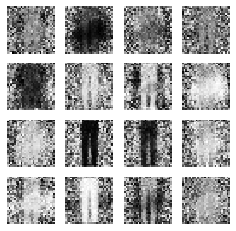

Epoch number 31 is finished. Looks like this: 



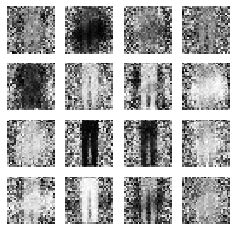

Epoch number 32 is finished. Looks like this: 



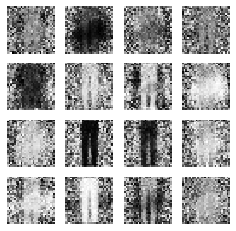

Epoch number 33 is finished. Looks like this: 



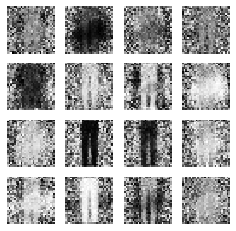

Epoch number 34 is finished. Looks like this: 



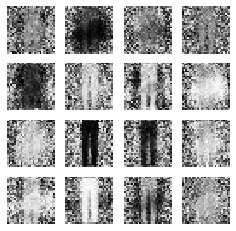

Epoch number 35 is finished. Looks like this: 



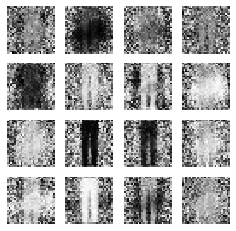

Epoch number 36 is finished. Looks like this: 



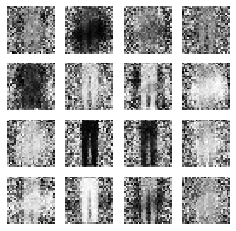

Epoch number 37 is finished. Looks like this: 



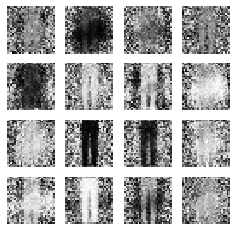

Epoch number 38 is finished. Looks like this: 



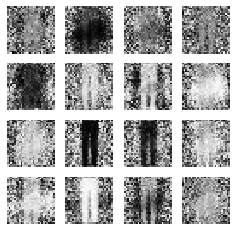

Epoch number 39 is finished. Looks like this: 



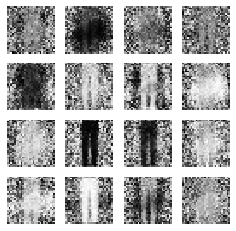

Epoch number 40 is finished. Looks like this: 



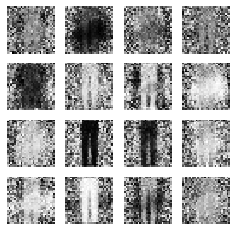

Epoch number 41 is finished. Looks like this: 



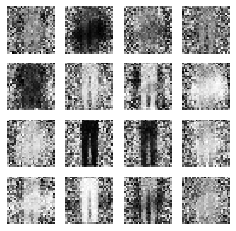

Epoch number 42 is finished. Looks like this: 



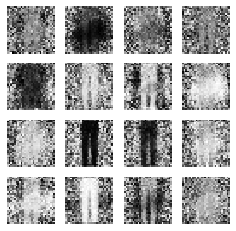

Epoch number 43 is finished. Looks like this: 



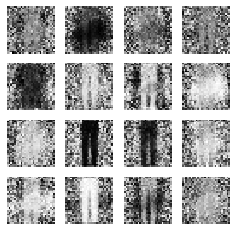

Epoch number 44 is finished. Looks like this: 



KeyboardInterrupt: 

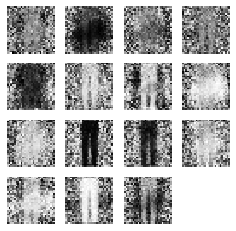

In [19]:
n_epochs = 50

for epoch in range(n_epochs):
    for image_batch in train_dataset:
        train_step(image_batch)
    print("Epoch number {} is finished. Looks like this: \n".format(epoch+1))
    generate_and_save_images(generator, epoch, seed)

In [36]:
new_seed = tf.random.normal([16, latent_dim])

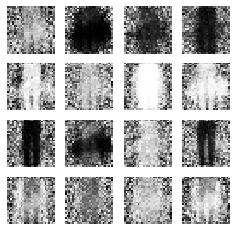

In [37]:
generate_and_save_images(generator, 123, new_seed)